In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

%matplotlib inline

# Dataset

In [2]:
df = pd.read_csv("bank-direct-marketing-campaigns.csv")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
# profile = ProfileReport(df)
# profile

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [5]:
df['y'].value_counts() #Imbalanced DataSet

no     36548
yes     4640
Name: y, dtype: int64

In [6]:
df = df.drop_duplicates(keep='last')
df['y'].value_counts() #Imbalanced DataSet

no     34806
yes     4598
Name: y, dtype: int64

In [7]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
df.shape

(39404, 20)

In [9]:
df.rename(columns={'default': 'has_credit_card'}, inplace=True) # 기본 신용여부  (범주형 변수: 'no', 'yes', 'unknown')
df.rename(columns={'poutcome': 'prev_outcome'}, inplace=True) # 이전 마케팅 캠페인의 결과  (범주형 변수: 'failure','nonexistent','success')
df.rename(columns={'emp.var.rate': 'emp_var_rate'}, inplace=True) # 고용 변동률 (수치형 변수)
df.rename(columns={'cons.conf.idx': 'confidence_index'}, inplace=True) # 소비자 신뢰 지수 (수치형 변수)
df.rename(columns={'cons.price.idx': 'price_index'}, inplace=True) # 소비자 물가 지수 (수치형 변수)
df.rename(columns={'euribor3m': 'eur_3month'}, inplace=True) # 유리보 3개월 금리 - 일별 지표 (수치형 변수)
df.rename(columns={'nr.employed': 'num_of_employees'}, inplace=True) # 직원 수 -  분기별 지표 (수치형 변수)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [10]:
df.head()

,age,job,marital,education,has_credit_card,housing,loan,contact,month,day_of_week,campaign,pdays,previous,prev_outcome,emp_var_rate,price_index,confidence_index,eur_3month,num_of_employees,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Numeric (수치형 변수)

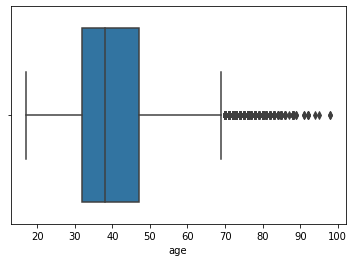

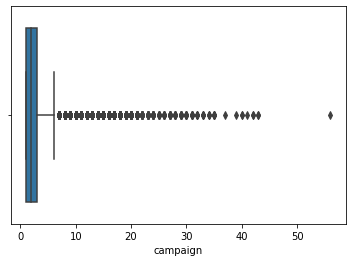

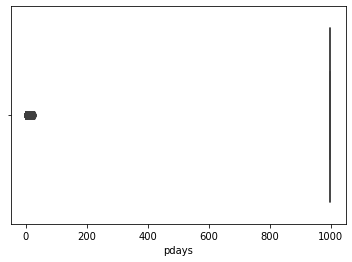

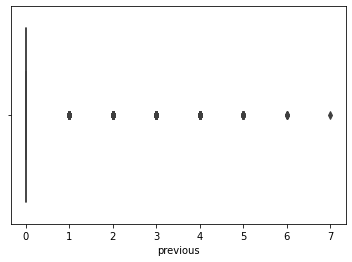

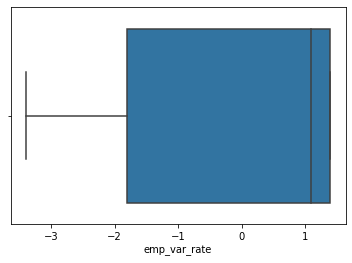

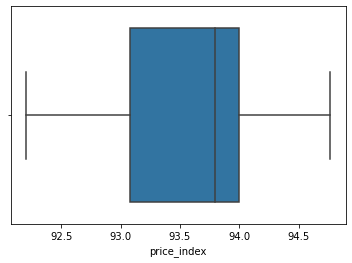

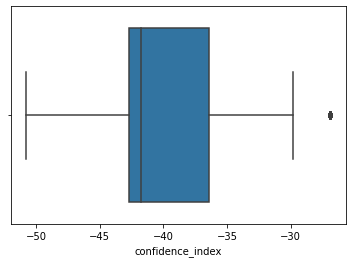

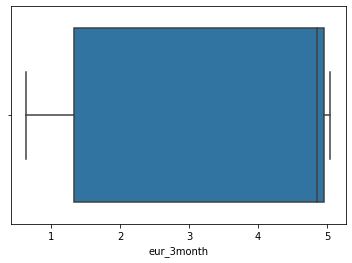

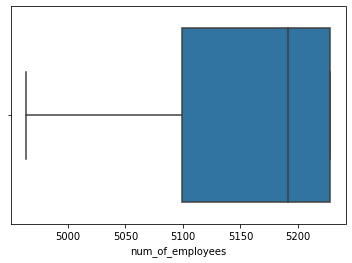

In [12]:
for i, col in enumerate(list(df.columns[df.dtypes != 'object'])):
    plt.figure(i)
    ax = sns.boxplot(x=df[col])

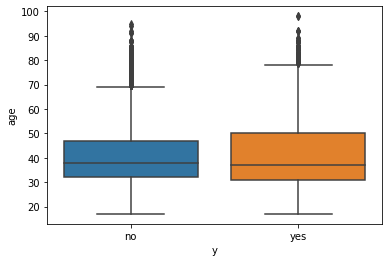

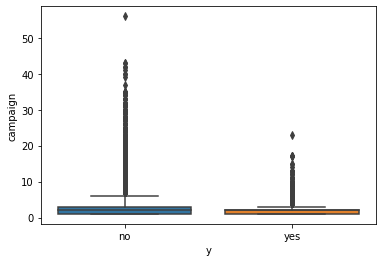

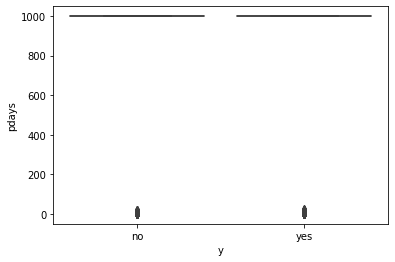

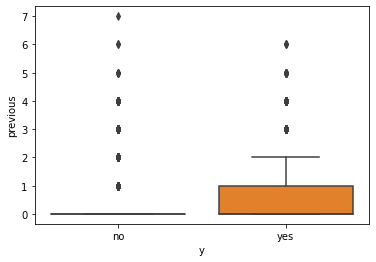

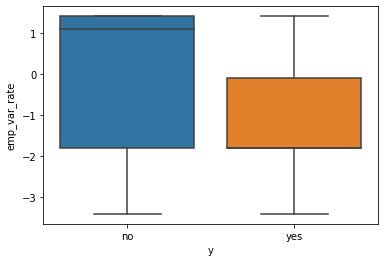

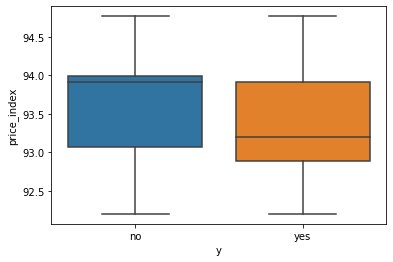

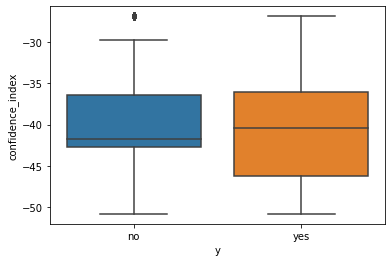

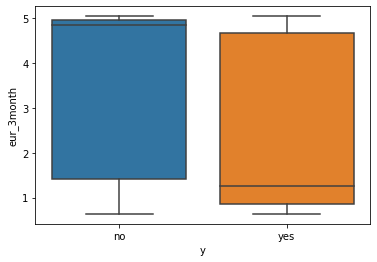

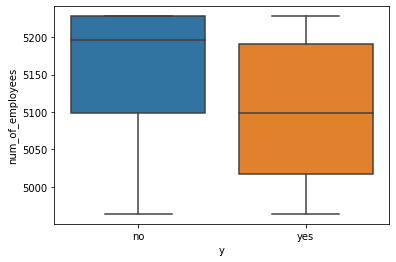

In [13]:
for col in list(df.columns[df.dtypes != 'object']):
    sns.boxplot(x=df['y'], y=df[col], data=df)
    plt.show();

In [14]:
# # y : yes-1, no-0
# df.loc[df["y"] == "yes"] = 1
# df.loc[df["y"] == "no"] = 0
# df

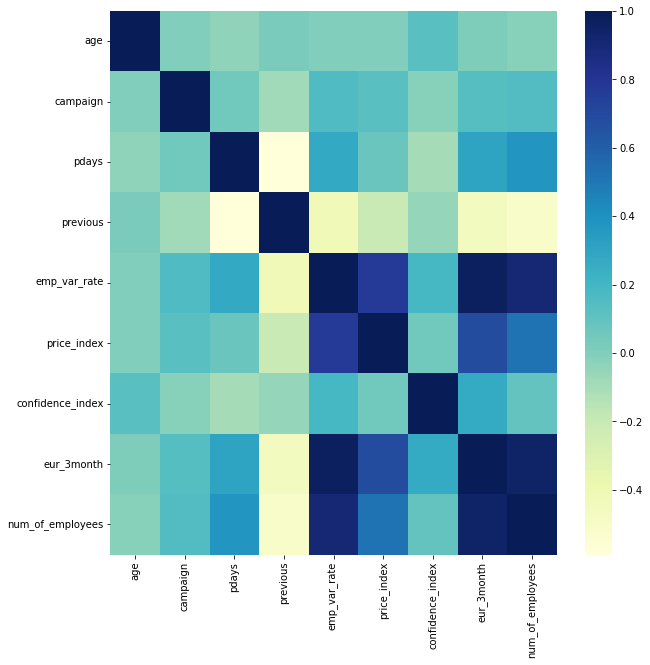

In [18]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), cmap='YlGnBu')
plt.show()

# Categorical (범주형 변수)

In [19]:
for col in list(df.columns[df.dtypes == 'object']):
    print(df[col].unique())

['housemaid' 'services' 'admin.' 'technician' 'blue-collar' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
['married' 'single' 'divorced' 'unknown']
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
['no' 'unknown' 'yes']
['no' 'yes' 'unknown']
['no' 'yes' 'unknown']
['telephone' 'cellular']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
['mon' 'tue' 'wed' 'thu' 'fri']
['nonexistent' 'failure' 'success']
['no' 'yes']


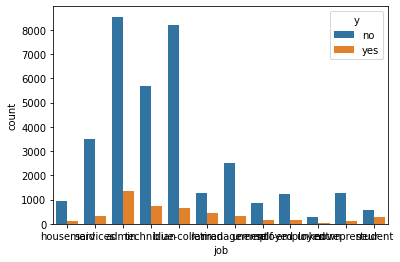

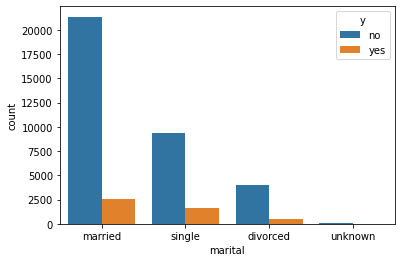

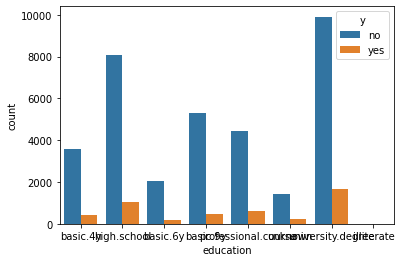

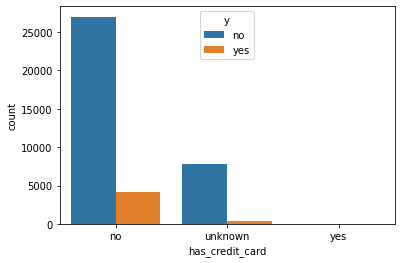

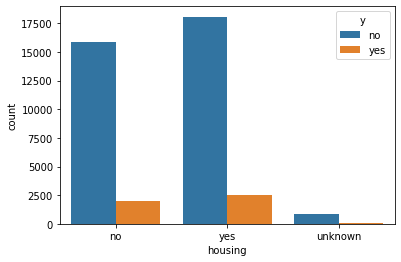

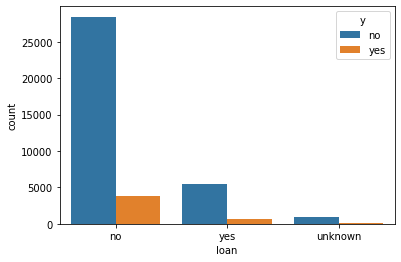

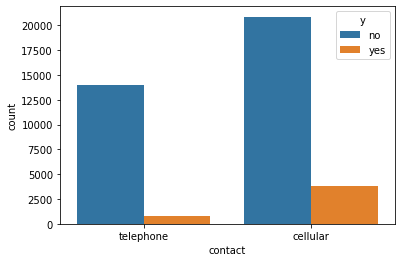

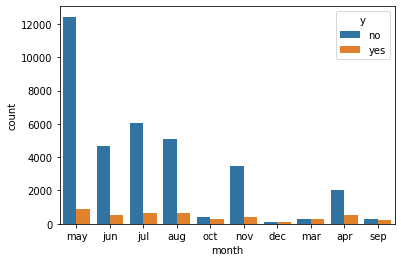

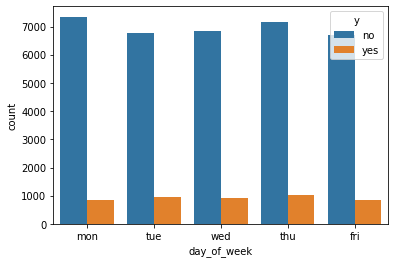

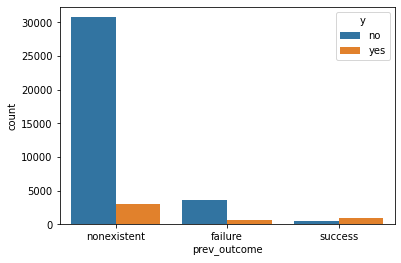

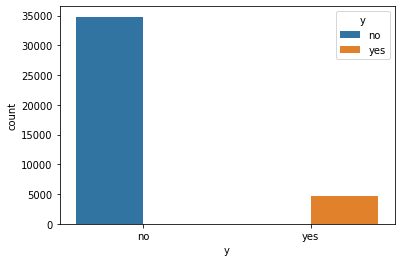

In [21]:
for i in list(df.columns[df.dtypes == 'object']):
    sns.countplot(x=i, hue=df['y'], data=df)
    plt.show()